In [1]:
print("24BAD026-GOKULNAATH M")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

24BAD026-GOKULNAATH M


In [2]:

iris = load_iris()

X = iris.data
y = iris.target

In [3]:
feature_names = iris.feature_names
class_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [6]:
df['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [10]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = gnb.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print("\nPrediction Comparison:\n", comparison.head())



Prediction Comparison:
    Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


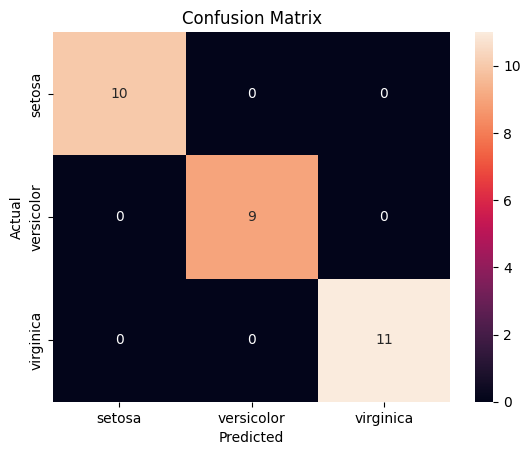

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Sample Class Probabilities (first 5 rows):

[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]


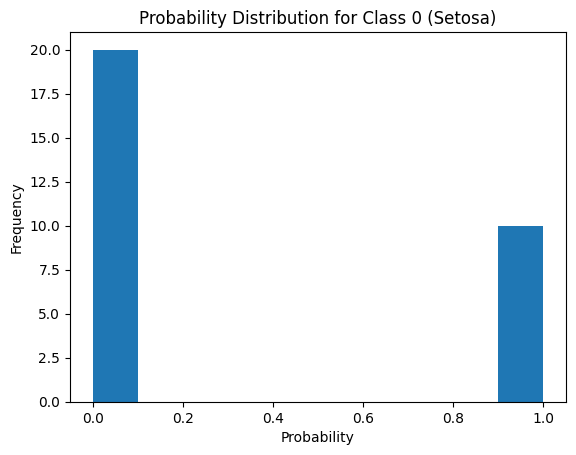

In [14]:
probabilities = gnb.predict_proba(X_test)

print("\nSample Class Probabilities (first 5 rows):\n")
print(probabilities[:5])

# Plot probability distribution for one class
plt.figure()
plt.hist(probabilities[:, 0], bins=10)
plt.title("Probability Distribution for Class 0 (Setosa)")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

In [15]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))



Logistic Regression Accuracy: 1.0


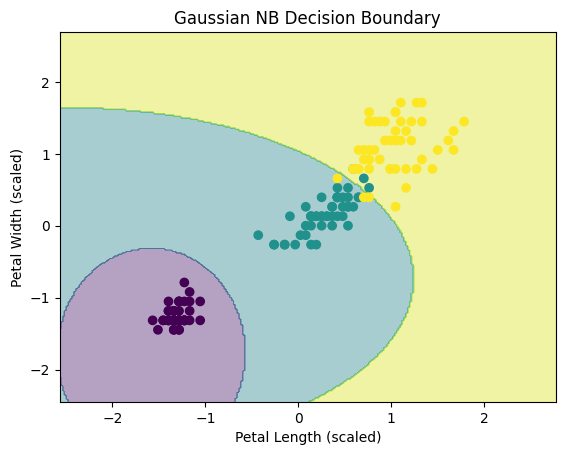

In [16]:
X_2 = iris.data[:, 2:4]   # Petal Length & Petal Width
y_2 = iris.target

scaler2 = StandardScaler()
X_2_scaled = scaler2.fit_transform(X_2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2_scaled, y_2, test_size=0.2, random_state=42
)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)

# Mesh grid
h = 0.02
x_min, x_max = X_2_scaled[:, 0].min() - 1, X_2_scaled[:, 0].max() + 1
y_min, y_max = X_2_scaled[:, 1].min() - 1, X_2_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=y_2)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("Gaussian NB Decision Boundary")
plt.show()

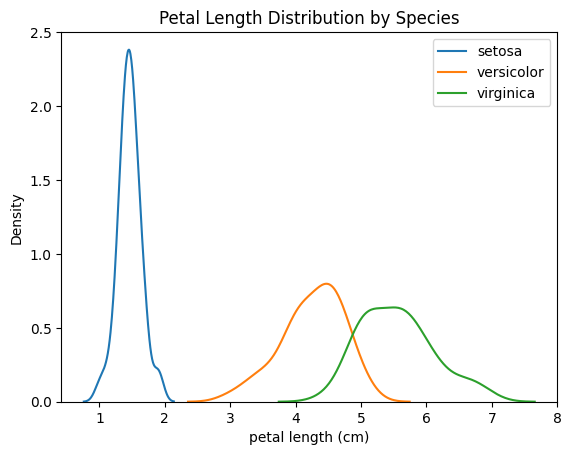

In [17]:
plt.figure()
for i in range(3):
    sns.kdeplot(df[df['species']==i][feature_names[2]],
                label=class_names[i])

plt.title("Petal Length Distribution by Species")
plt.legend()
plt.show()